# Самостоятельное задание.

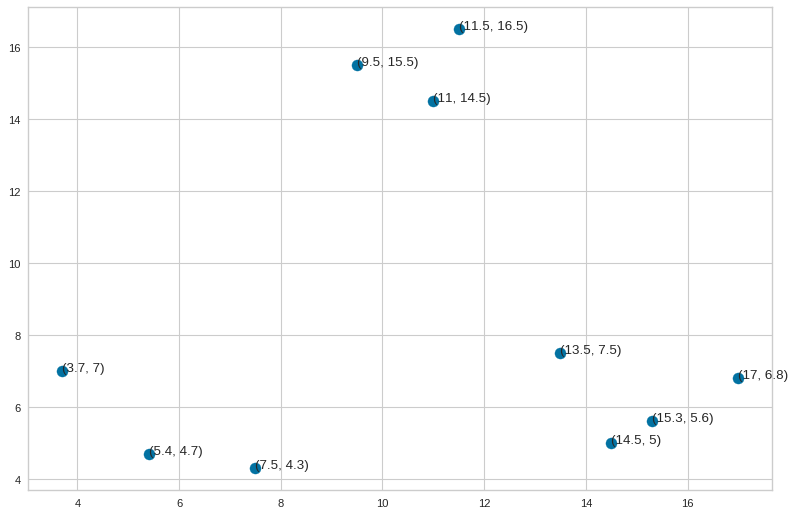

In [92]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x,y, s=100)

for i, txt in enumerate(zip(x, y)):
    plt.annotate(txt, (x[i], y[i]))

      X     Y
0  11.5  16.5
1   9.5  15.5
2  11.0  14.5
3  13.5   7.5
4  17.0   6.8
5  15.3   5.6
6  14.5   5.0
7   3.7   7.0
8   5.4   4.7
9   7.5   4.3


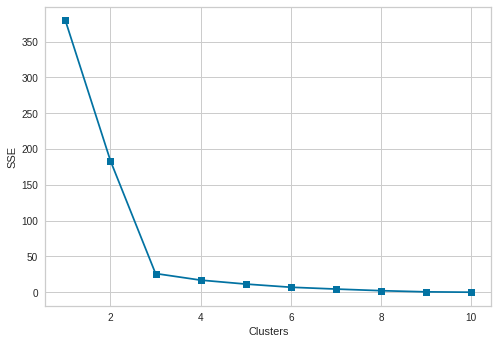

In [93]:
dt = pd.DataFrame({"X": x, "Y": y})
print(dt)
SSE = []

for i in range(1, 11):
  kmn = KMeans(i);
  kmn.fit(dt)
  SSE.append(kmn.inertia_)

plt.plot(range(1,11), SSE, marker="s")
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

In [94]:
kmn = KMeans(3)
kmn.fit(dt)
kmn.labels_

array([1, 1, 1, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [95]:
dte = pd.DataFrame(kmn.predict(dt), columns = ["pred"])
fdt = pd.concat([dt, dte], axis = 1)
fdt

,X,Y,pred
0,11.5,16.5,1
1,9.5,15.5,1
2,11.0,14.5,1
3,13.5,7.5,0
4,17.0,6.8,0
5,15.3,5.6,0
6,14.5,5.0,0
7,3.7,7.0,2
8,5.4,4.7,2
9,7.5,4.3,2


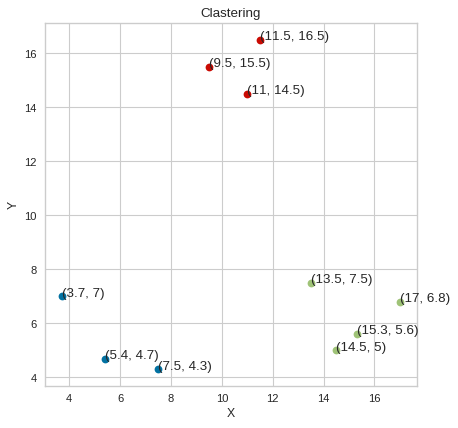

In [96]:
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(fdt[fdt["pred"] == 0]['X'], fdt[fdt["pred"] == 0]['Y'], 'go')
plt.plot(fdt[fdt["pred"] == 1]['X'], fdt[fdt["pred"] == 1]['Y'], 'ro')
plt.plot(fdt[fdt["pred"] == 2]['X'], fdt[fdt["pred"] == 2]['Y'], 'bo')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Clastering")

for i, txt in enumerate(zip(x, y)):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

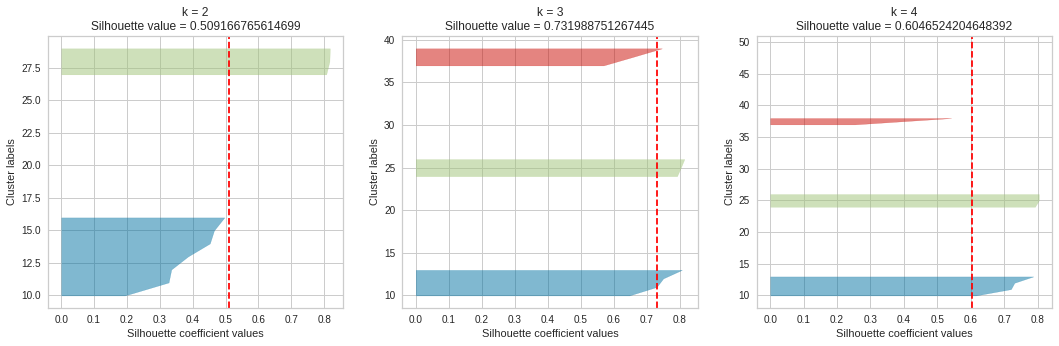

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in [2, 3, 4]:
    kmn = KMeans(i)
    kmn.fit(dt.values)
    ax[i-2].set_title(f"k = {i}\nSilhouette value = {silhouette_score(dt.values, kmn.predict(dt.values), metric='euclidean')}")
    ax[i-2].set_xlabel("Silhouette coefficient values")
    ax[i-2].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(kmn, colors='yellowbrick', ax=ax[i-2])
    visualizer.fit(dt.values)
    